# Dogs vs Cats Image Classification With Image Augmentation

# Importing packages

In [1]:
import tensorflow as tf

2024-09-28 23:18:06.015435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 23:18:06.030316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 23:18:06.034494: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 23:18:06.044882: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [3]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

zip_dir = tf.keras.utils.get_file(
    "cats_and_dogs_filterted.zip", origin=_URL, extract=True
)

The dataset we have downloaded has following directory structure.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

We'll now assign variables with the proper file path for the training and validation sets.

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

In [5]:
train_cats_dir = os.path.join(
    train_dir, "cats"
)  # directory with our training cat pictures
train_dogs_dir = os.path.join(
    train_dir, "dogs"
)  # directory with our training dog pictures
validation_cats_dir = os.path.join(
    validation_dir, "cats"
)  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(
    validation_dir, "dogs"
)  # directory with our validation dog pictures

### Understanding our data

Let's look at how many cats and dogs images we have in our training and validation directory

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print("total training cat images:", num_cats_tr)
print("total training dog images:", num_dogs_tr)

print("total validation cat images:", num_cats_val)
print("total validation dog images:", num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


# Setting Model Parameters

In [8]:
BATCH_SIZE = 100
IMG_SHAPE = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

After defining our generators for training and validation images, **flow_from_directory** method will load images from the disk and will apply rescaling and will resize them into required dimensions using single line of code.

# Data Augmentation

Overfitting often occurs when we have a small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number and variety of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples through random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This exposes the model to more aspects of the data, allowing it to generalize better.

In **tf.keras** we can implement this using the same **ImageDataGenerator** class we used before. We can simply pass different transformations we would want to our dataset as a form of arguments and it will take care of applying it to the dataset during our training process.

To start off, let's define a function that can display an image, so we can see the type of augmentation that has been performed. Then, we'll look at specific augmentations that we'll use during training.

In [9]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Flipping the image horizontally

We can begin by randomly applying horizontal flip augmentation to our dataset and seeing how individual images will look after the transformation. This is achieved by passing `horizontal_flip=True` as an argument to the `ImageDataGenerator` class.

In [10]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, horizontal_flip=True
)

train_data_gen = image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
)

Found 2000 images belonging to 2 classes.


To see the transformation in action, let's take one sample image from our training set and repeat it five times. The augmentation will be randomly applied (or not) to each repetition.

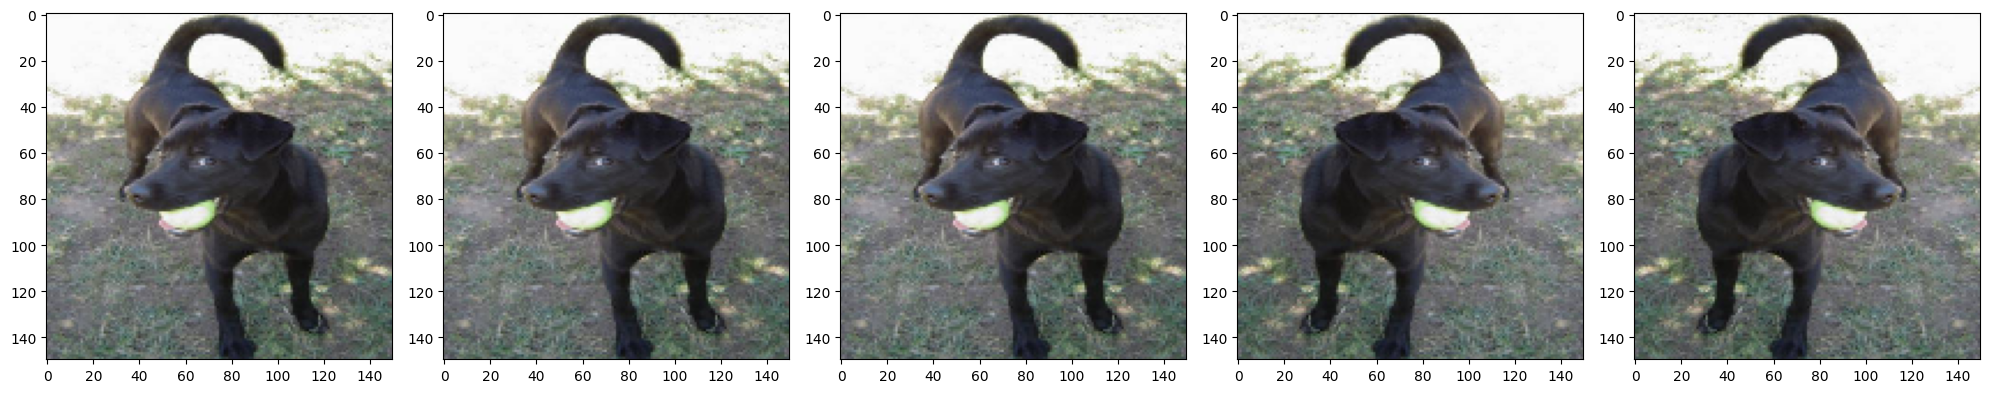

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Rotating the image

The rotation augmentation will randomly rotate the image up to a specified number of degrees. Here, we'll set it to 45.

In [12]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, rotation_range=45
)

train_data_gen = image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
)

Found 2000 images belonging to 2 classes.


To see the transformation in action, let's once again take a sample image from our training set and repeat it. The augmentation will be randomly applied (or not) to each repetition.

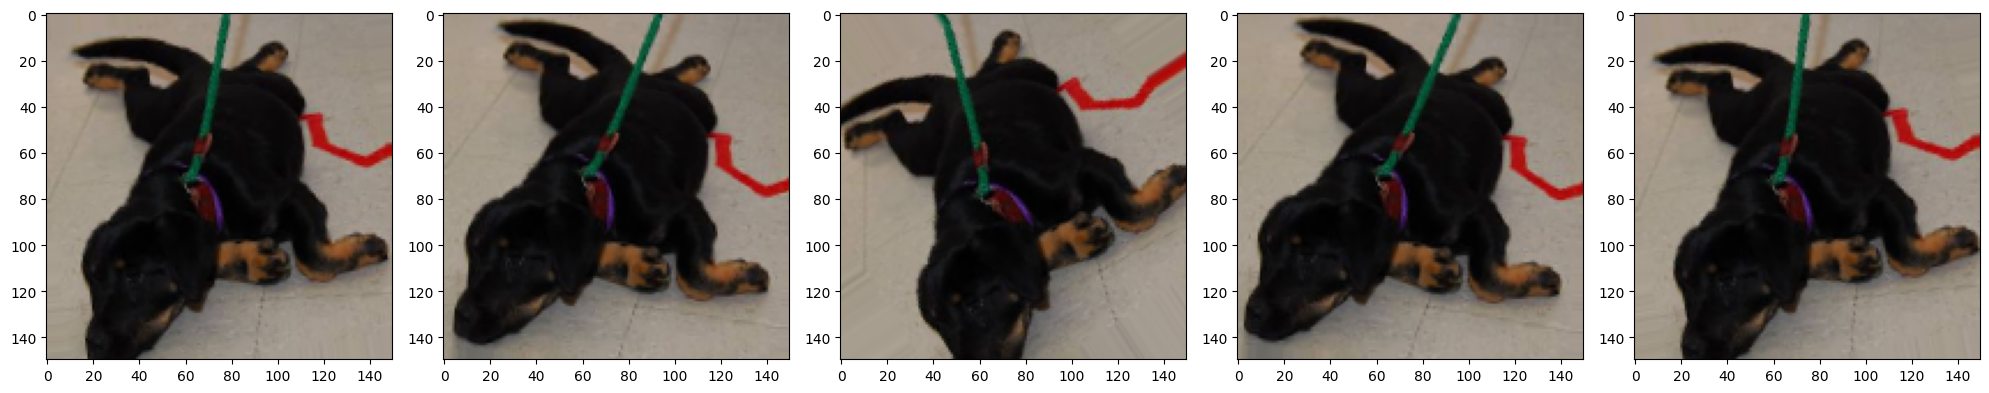

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Applying Zoom

We can also apply Zoom augmentation to our dataset, zooming images up to 50% randomly.

In [14]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, zoom_range=0.5
)

train_data_gen = image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
)

Found 2000 images belonging to 2 classes.


One more time, take a sample image from our training set and repeat it. The augmentation will be randomly applied (or not) to each repetition.

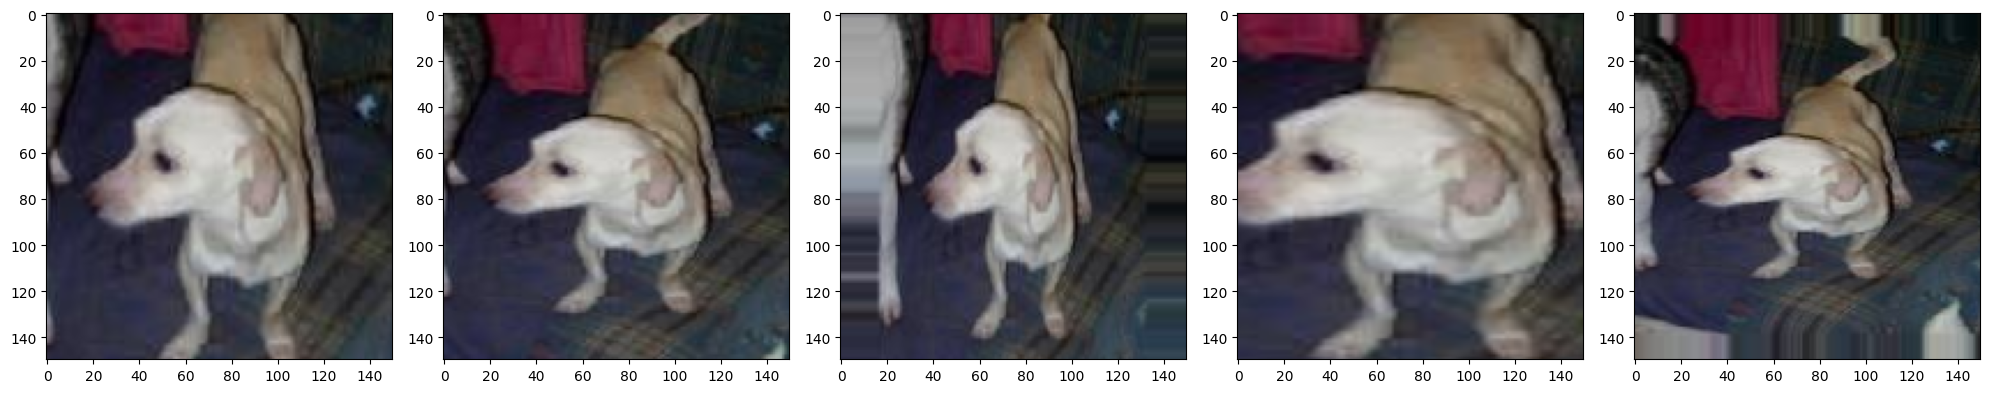

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Putting it all together

We can apply all these augmentations, and even others, with just one line of code, by passing the augmentations as arguments with proper values.

Here, we have applied rescale, rotation of 45 degrees, width shift, height shift, horizontal flip, and zoom augmentation to our training images.

In [16]:
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode="binary",
)

Found 2000 images belonging to 2 classes.


Let's visualize how a single image would look like five different times, when we pass these augmentations randomly to our dataset.

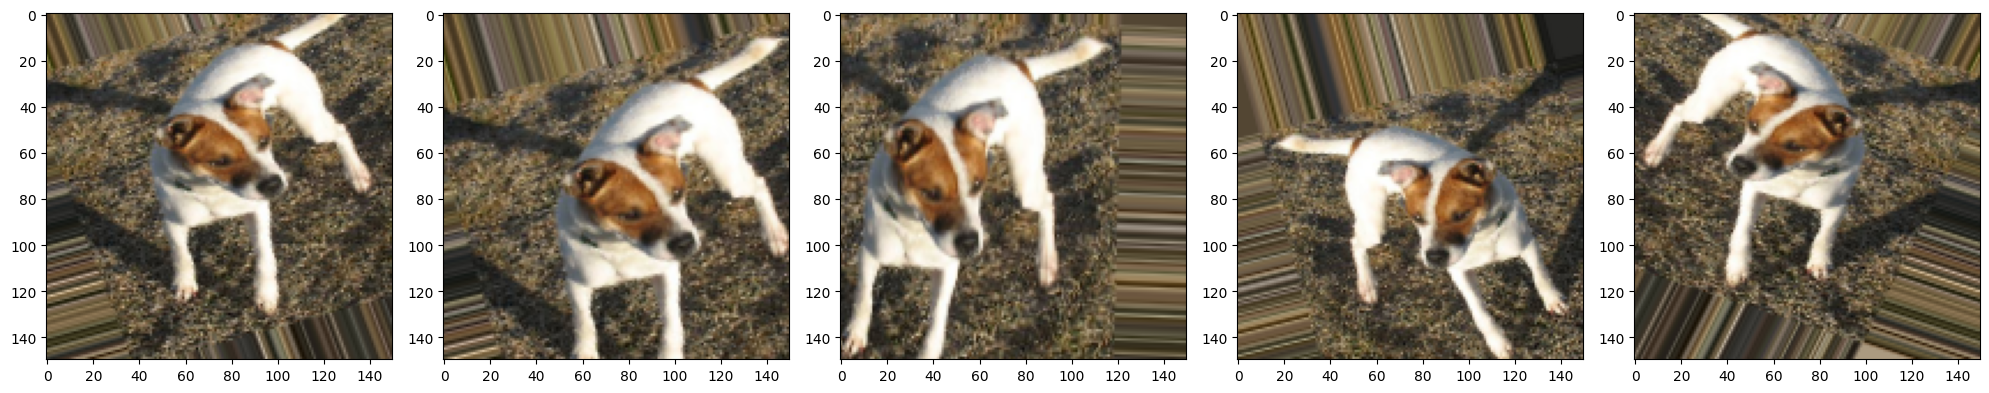

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Creating Validation Data generator

Generally, we only apply data augmentation to our training examples, since the original images should be representative of what our model needs to manage. So, in this case we are only rescaling our validation images and converting them into batches using ImageDataGenerator.

In [18]:
image_gen_val = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_SHAPE, IMG_SHAPE),
    class_mode="binary",
)

Found 1000 images belonging to 2 classes.


# Model Creation

## Define the model

The model consists of four convolution blocks with a max pool layer in each of them.

Before the final Dense layers, we're also applying a Dropout probability of 0.5. It means that 50% of the values coming into the Dropout layer will be set to zero. This helps to prevent overfitting.

Then we have a fully connected layer with 512 units, with a `relu` activation function. The model will output class probabilities for two classes — dogs and cats — using `softmax`.

In [19]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(2),
    ]
)

/home/omar/miniconda3/envs/.tf217/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727554698.109854   12696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727554698.210704   12696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727554698.210741   12696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727554698.213315   12696 

### Compiling the model

As usual, we will use the `adam` optimizer. Since we output a softmax categorization, we'll use `sparse_categorical_crossentropy` as the loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so we are passing in the metrics argument.

In [20]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

### Model Summary

Let's look at all the layers of our network using **summary** method.

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

It's time we train our network.

Since our batches are coming from a generator (`ImageDataGenerator`), we'll use `fit_generator` instead of `fit`.

In [22]:
epochs = 100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
)

Epoch 1/100


/home/omar/miniconda3/envs/.tf217/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727554705.284899   12882 service.cc:146] XLA service 0x7f64580050e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727554705.284940   12882 service.cc:154]   StreamExecutor device (0): Quadro T2000, Compute Capability 7.5
2024-09-28 23:18:25.340508: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-28 23:18:25.585191: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:17

 1/20 ━━━━━━━━━━━━━━━━━━━━ 4:23 14s/step - accuracy: 0.4700 - loss: 0.6978

I0000 00:00:1727554714.729693   12882 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.4897 - loss: 0.7199

2024-09-28 23:18:41.233248: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.59GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-28 23:18:48.997392: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=2,k3=0} for conv (f32[100,64,72,72]{3,2,1,0}, u8[0]{0}) custom-call(f32[100,32,74,74]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-09-28 23:18:49.020927: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The

20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 455ms/step - accuracy: 0.4905 - loss: 0.7194 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


2024-09-28 23:18:43.506176: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-28 23:18:43.506225: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 23:18:43.506239: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:18:43.506265: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
/home/omar/miniconda3/envs/.tf217/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  se

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.5225 - loss: 0.6884 - val_accuracy: 0.5190 - val_loss: 0.6606
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100


2024-09-28 23:18:53.111689: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:18:53.111750: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:18:53.115559: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 23:18:53.115595: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:18:53.115624: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s -60204us/step - accuracy: 0.5741 - loss: 0.6616 - val_accuracy: 0.6100 - val_loss: 0.6470
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100


2024-09-28 23:19:02.926585: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:02.926650: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:19:02.930837: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:02.930901: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s -52255us/step - accuracy: 0.5887 - loss: 0.6533 - val_accuracy: 0.6830 - val_loss: 0.6112
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100


2024-09-28 23:19:13.120305: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:13.120375: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:19:13.124717: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 23:19:13.124756: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:13.124786: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.6332 - loss: 0.6331 - val_accuracy: 0.6860 - val_loss: 0.6020
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100


2024-09-28 23:19:23.155866: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:23.155946: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:19:23.159811: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:23.159870: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s -61148us/step - accuracy: 0.6604 - loss: 0.6181 - val_accuracy: 0.6000 - val_loss: 0.6341
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/100


2024-09-28 23:19:32.958971: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:32.959035: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:19:32.963055: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:32.963110: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s -65427us/step - accuracy: 0.6486 - loss: 0.6166 - val_accuracy: 0.7130 - val_loss: 0.5731
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/100


2024-09-28 23:19:42.871852: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:42.871921: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:19:42.876293: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:42.876355: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - accuracy: 0.6769 - loss: 0.6041 - val_accuracy: 0.7090 - val_loss: 0.5623
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/100


2024-09-28 23:19:52.713034: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:52.713099: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:19:52.716943: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 23:19:52.716982: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:19:52.717012: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.7009 - loss: 0.5692 - val_accuracy: 0.7070 - val_loss: 0.5701
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/100


2024-09-28 23:20:02.564170: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:02.564233: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:20:02.568106: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:02.568169: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.6937 - loss: 0.5798 - val_accuracy: 0.6950 - val_loss: 0.5798
Epoch 20/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 21/100


2024-09-28 23:20:12.375169: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:12.375241: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:20:12.379322: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:12.379385: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.6856 - loss: 0.5891 - val_accuracy: 0.7110 - val_loss: 0.5439
Epoch 22/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 23/100


2024-09-28 23:20:22.249035: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:22.249098: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:20:22.252909: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:22.252963: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.7038 - loss: 0.5694 - val_accuracy: 0.7280 - val_loss: 0.5484
Epoch 24/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 25/100


2024-09-28 23:20:32.069199: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:32.069264: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:20:32.073182: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:32.073239: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.6735 - loss: 0.5862 - val_accuracy: 0.6910 - val_loss: 0.5628
Epoch 26/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 27/100


2024-09-28 23:20:41.895570: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:41.895636: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:20:41.899872: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:41.899937: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.7171 - loss: 0.5618 - val_accuracy: 0.6900 - val_loss: 0.5659
Epoch 28/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 29/100


2024-09-28 23:20:51.908841: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:51.908918: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:20:51.913136: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:20:51.913201: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.6949 - loss: 0.5759 - val_accuracy: 0.7080 - val_loss: 0.5576
Epoch 30/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 31/100


2024-09-28 23:21:02.036905: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:02.036972: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:21:02.041143: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:02.041201: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.7199 - loss: 0.5430 - val_accuracy: 0.7470 - val_loss: 0.5236
Epoch 32/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 33/100


2024-09-28 23:21:12.007330: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:12.007395: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:21:12.012797: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 23:21:12.012849: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:12.012879: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 323ms/step - accuracy: 0.7362 - loss: 0.5399 - val_accuracy: 0.7340 - val_loss: 0.5239
Epoch 34/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 35/100


2024-09-28 23:21:22.016851: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:22.016918: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:21:22.020921: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:22.020976: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.7383 - loss: 0.5322 - val_accuracy: 0.7380 - val_loss: 0.5162
Epoch 36/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 37/100


2024-09-28 23:21:32.052414: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:32.052481: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:21:32.056492: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:32.056555: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 702ms/step - accuracy: 0.7262 - loss: 0.5375 - val_accuracy: 0.7310 - val_loss: 0.5269
Epoch 38/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 39/100


2024-09-28 23:21:49.327506: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:49.327569: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:21:49.332585: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:49.332717: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 715ms/step - accuracy: 0.7253 - loss: 0.5440 - val_accuracy: 0.7520 - val_loss: 0.5105
Epoch 40/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 41/100


2024-09-28 23:21:59.404451: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:59.404517: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:21:59.408860: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:21:59.408917: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.7278 - loss: 0.5509 - val_accuracy: 0.7310 - val_loss: 0.5467
Epoch 42/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 43/100


2024-09-28 23:22:02.031191: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:02.031258: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:22:02.035603: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:02.035695: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.7193 - loss: 0.5451 - val_accuracy: 0.7500 - val_loss: 0.4988
Epoch 44/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 45/100


2024-09-28 23:22:12.210529: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:12.210595: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:22:12.214727: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:12.214791: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.7267 - loss: 0.5362 - val_accuracy: 0.7300 - val_loss: 0.5262
Epoch 46/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 47/100


2024-09-28 23:22:22.292101: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:22.292164: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:22:22.297065: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:22.297137: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.7295 - loss: 0.5232 - val_accuracy: 0.7750 - val_loss: 0.4883
Epoch 48/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 49/100


2024-09-28 23:22:32.303394: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:32.303459: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:22:32.307401: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:32.307472: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 323ms/step - accuracy: 0.7315 - loss: 0.5281 - val_accuracy: 0.7550 - val_loss: 0.4947
Epoch 50/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 51/100


2024-09-28 23:22:42.553419: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:42.553485: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:22:42.557335: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:42.557399: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.7142 - loss: 0.5345 - val_accuracy: 0.7450 - val_loss: 0.5140
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 53/100


2024-09-28 23:22:52.590556: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:52.590622: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:22:52.594421: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:22:52.594481: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 332ms/step - accuracy: 0.7569 - loss: 0.5055 - val_accuracy: 0.7370 - val_loss: 0.5218
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 55/100


2024-09-28 23:23:02.811419: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:02.811483: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:23:02.815409: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:02.815463: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 316ms/step - accuracy: 0.7423 - loss: 0.5357 - val_accuracy: 0.7730 - val_loss: 0.4980
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 57/100


2024-09-28 23:23:12.731277: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:12.731343: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:23:12.735124: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:12.735185: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.7416 - loss: 0.5112 - val_accuracy: 0.7510 - val_loss: 0.5031
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 59/100


2024-09-28 23:23:22.705543: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:22.705622: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:23:22.710567: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:22.710632: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step - accuracy: 0.7496 - loss: 0.4972 - val_accuracy: 0.7640 - val_loss: 0.4675
Epoch 60/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 61/100


2024-09-28 23:23:32.692651: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:32.692716: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:23:32.696620: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:32.696684: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.7640 - loss: 0.4846 - val_accuracy: 0.7620 - val_loss: 0.4677
Epoch 62/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 63/100


2024-09-28 23:23:42.696565: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:42.696630: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:23:42.700993: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:42.701088: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.7731 - loss: 0.4810 - val_accuracy: 0.7730 - val_loss: 0.4745
Epoch 64/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 65/100


2024-09-28 23:23:52.668931: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:52.668998: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:23:52.673152: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-28 23:23:52.673197: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:23:52.673212: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 322ms/step - accuracy: 0.7515 - loss: 0.4988 - val_accuracy: 0.7630 - val_loss: 0.4922
Epoch 66/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 67/100


2024-09-28 23:24:02.815261: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:02.815344: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:24:02.819279: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:02.819341: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.7495 - loss: 0.4959 - val_accuracy: 0.7840 - val_loss: 0.4563
Epoch 68/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 69/100


2024-09-28 23:24:12.741565: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:12.741632: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:24:12.745494: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:12.745553: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.7789 - loss: 0.4788 - val_accuracy: 0.7600 - val_loss: 0.4823
Epoch 70/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 71/100


2024-09-28 23:24:22.864430: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:22.864494: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:24:22.868407: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:22.868464: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 323ms/step - accuracy: 0.7711 - loss: 0.4745 - val_accuracy: 0.7920 - val_loss: 0.4551
Epoch 72/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 73/100


2024-09-28 23:24:32.832786: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:32.832852: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:24:32.836784: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:32.836846: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.7786 - loss: 0.4657 - val_accuracy: 0.7770 - val_loss: 0.4551
Epoch 74/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 75/100


2024-09-28 23:24:42.791105: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:42.791169: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:24:42.794968: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:42.795033: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 303ms/step - accuracy: 0.7730 - loss: 0.4648 - val_accuracy: 0.7820 - val_loss: 0.4599
Epoch 76/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 77/100


2024-09-28 23:24:52.358627: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:52.358689: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:24:52.362552: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:24:52.362622: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.7772 - loss: 0.4597 - val_accuracy: 0.7960 - val_loss: 0.4377
Epoch 78/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 79/100


2024-09-28 23:25:02.525036: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:02.525119: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:25:02.528711: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:02.528765: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 711ms/step - accuracy: 0.7943 - loss: 0.4366 - val_accuracy: 0.7300 - val_loss: 0.5243
Epoch 80/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 81/100


2024-09-28 23:25:12.217409: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:12.217469: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.7884 - loss: 0.4484 - val_accuracy: 0.7880 - val_loss: 0.4310
Epoch 82/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 83/100


2024-09-28 23:25:22.346416: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:22.346478: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:25:22.350415: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:22.350473: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.8036 - loss: 0.4203 - val_accuracy: 0.8040 - val_loss: 0.4096
Epoch 84/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 85/100


2024-09-28 23:25:32.356040: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:32.356103: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:25:32.360907: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:32.360971: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.7941 - loss: 0.4310 - val_accuracy: 0.7880 - val_loss: 0.4522
Epoch 86/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 87/100


2024-09-28 23:25:42.139090: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:42.139150: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:25:42.142906: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:42.142958: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.7785 - loss: 0.4513 - val_accuracy: 0.7800 - val_loss: 0.4482
Epoch 88/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 89/100


2024-09-28 23:25:51.590093: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:51.590166: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:25:51.594653: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:25:51.594719: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 375ms/step - accuracy: 0.8045 - loss: 0.4134 - val_accuracy: 0.8000 - val_loss: 0.4336
Epoch 90/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 91/100


2024-09-28 23:26:02.180071: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:02.180134: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:26:02.183835: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:02.183886: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step - accuracy: 0.7954 - loss: 0.4353 - val_accuracy: 0.8070 - val_loss: 0.4074
Epoch 92/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 93/100


2024-09-28 23:26:11.881529: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:11.881590: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:26:11.885415: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:11.885467: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - accuracy: 0.8251 - loss: 0.3983 - val_accuracy: 0.8030 - val_loss: 0.4088
Epoch 94/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 95/100


2024-09-28 23:26:21.630925: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:21.631037: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:26:21.635648: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:21.635734: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 332ms/step - accuracy: 0.8207 - loss: 0.3929 - val_accuracy: 0.8100 - val_loss: 0.4211
Epoch 96/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 97/100


2024-09-28 23:26:31.151739: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:31.151801: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:26:31.155270: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:31.155325: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.8246 - loss: 0.4066 - val_accuracy: 0.8140 - val_loss: 0.4162
Epoch 98/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 99/100


2024-09-28 23:26:40.629000: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:40.629085: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:26:40.633193: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:40.633251: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 326ms/step - accuracy: 0.8165 - loss: 0.4079 - val_accuracy: 0.7840 - val_loss: 0.4639
Epoch 100/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


2024-09-28 23:26:50.086675: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:50.086739: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
2024-09-28 23:26:50.091564: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1770686864239133340
2024-09-28 23:26:50.091634: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14897850277582848518
